# 생물정보학 및 실습 1 - Free Project
## Lin28A binding motif를 찾고 motif flanking sites에 대한 Watson-Crick pair occurrence Analysis 

### 환경 세팅 하기 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Bioconda 환경 설치


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.condarc
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.tmux.conf
./root/.profile
./root/.vimrc
./root/.bashrc.biolab
PREFIX=/root/conda
Unpacking payload ...
Solving environment: | / - \ | done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
!conda install -y bedtools bioawk

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h7132678_7


Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done


In [ ]:
%cd /content/drive/MyDrive/binfo1-datapack01/

/content/drive/MyDrive/binfo1-datapack01


##Identification of Lin28A binding motif
### -Fig SC3 그리기-


<p>RNA-protein interaction을 찾기 위해서는 CLIP-seq을 진행하게 되는데 이때 UV cross-linking 단계에서 UV 광선에 의해 binding site에서 substitution과 deletion이 많이 일어난다. </p>
Substitution이 많이 일어난 position을 찾기 위해 전체 Genome에 대해서 pileup 한다.

In [ ]:
!samtools mpileup CLIP-35L33G.bam > CLIP-35L33G.pileup
!wc -l CLIP-35L33G.pileup

[mpileup] 1 samples in 1 input files
959697300 CLIP-35L33G.pileup


In [ ]:
!head CLIP-35L33G.pileup

chr1	3056473	N	4	^!G^!G^!G^!G	HGGI
chr1	3056474	N	4	AAAA	HB@I
chr1	3056475	N	4	AAAA	GG?I
chr1	3056476	N	4	TTTT	HGGH
chr1	3056477	N	4	GGGG	HEGI
chr1	3056478	N	4	GGGG	GEEI
chr1	3056479	N	4	AAAA	EA=I
chr1	3056480	N	4	AAAA	@AEH
chr1	3056481	N	4	GGGG	GFFI
chr1	3056482	N	4	TTTT	G=BG


In [ ]:
!tail CLIP-35L33G.pileup

MU069435.1	31102	N	4	GGGG	IDDB
MU069435.1	31103	N	4	GGGG	DEBE
MU069435.1	31104	N	4	GGGG	EDDE
MU069435.1	31105	N	4	TTTT	@><8
MU069435.1	31106	N	4	TTT$T$	DG<;
MU069435.1	31107	N	2	GG	BC
MU069435.1	31108	N	2	GG	B>
MU069435.1	31109	N	2	TT	@3
MU069435.1	31110	N	2	GG	B1
MU069435.1	31111	N	2	G$G$	@6


Filtering with depth (30) -> (50)으로 수정

In [ ]:
!awk '$4 > 30 {print $0;}' CLIP-35L33G.pileup > CLIP-35L33G-filt.pileup
!wc -l CLIP-35L33G-filt.pileup

45781030 CLIP-35L33G-filt.pileup


In [ ]:
!tail CLIP-35L33G-filt.pileup

MU069435.1	1559	N	346	>>>>TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT$TT$T$T$TTTTTTTTTTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	DIDHGHIIIIIIEEIEIGIIEGGBGGDG:BEBHDDFBIGIEHGIIGIIIHBGIBB>G?DI3IGBEI7GGGGI4GII=G?IIGDIIHIIEHGIHIHGEIHIG=EIHGIIHIGIIIIDIDIIIEIIIIIIGIHIIFI@GGIIIIBIIEIGHH?@IAIGI@HIBHHHFAGIGHGHDIIGIGIIBGIEFHIGGIIIIGHIHIDIIFIHIGGIH@DHGHHDIEDIIEIII8GDHHGHIBGIIHIDIAIGIHIIHEG4II>HD?IH@IFIHGIGDHH;AFGH@EGH:BCHG>IEIDIHIHIIHIIIIIIHHGHIGIIGIGFHGCII=HD@HI?IIIGHGGIHIGIDDH>HFB
MU069435.1	1560	N	341	>>>>TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT$T$T$T$TT$T$TT$T$T$T$TT$TT$TT$TTT$TT$T$T$TT$TT$T$TTT$T$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

Baseread에서 Match와 Substitution만 남기고 제거한 후 (Deletion 고려하지 않음) 
<br/>
Shannon's entropy를 계산한다. 

In [ ]:
import pandas as pd 
import re 
import collections 
import math

def estimate_shannon_entropy(rna_sequence):
    rna_sequence = rna_sequence.upper()
    m = len(rna_sequence)
    bases = collections.Counter([tmp_base for tmp_base in rna_sequence])
 
    shannon_entropy_value = 0
    for base in bases:
        # number of residues
        n_i = bases[base]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return shannon_entropy_value * -1


def chunk_processing(chunck): # define a function that you will use on chunks
    toremove = re.compile('-[0-9]+[ACGTNacgtn]+')
    chunck['matches'] = chunck['basereads'].apply(lambda x: toremove.sub('', x))
    toremove = re.compile('\+[0-9]+[ACGTNacgtn]+')
    chunck['matches'] = chunck['matches'].apply(lambda x: toremove.sub('', x))
    toremove = re.compile('[<>$*#]')
    chunck['matches'] = chunck['matches'].apply(lambda x: toremove.sub('', x))
    toremove = re.compile('[\^][\w]')
    chunck['matches'] = chunck['matches'].apply(lambda x: toremove.sub('', x))
    toremove = re.compile('[\^][\W]')
    chunck['matches'] = chunck['matches'].apply(lambda x: toremove.sub('', x))
    chunck['entropy'] = chunck.apply(lambda x: estimate_shannon_entropy(x['matches']), axis=1)
    return chunck


chunk_list = [] # create an empty list to hold chunks
chunksize = 10 ** 6 # set chunk size
for chunk in pd.read_csv('CLIP-35L33G-filt.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'],chunksize=chunksize): # read in csv in chunks of chunksize
    processed_chunk = chunk_processing(chunk) # process the chunks with chunk_processing() function
    chunk_list.append(processed_chunk) # append the chunks to a list
df_concat = pd.concat(chunk_list) # concatenate the list to a dataframe
df_concat.to_csv("CLIP-35L33G-filtU.csv", sep='\t', index=False)

In [ ]:
import pandas as pd 
import re 
import collections 
import math

In [ ]:
df_concat = pd.read_csv("CLIP-35L33G-filtU.csv", sep='\t')

Filtering with Entropy (1.0) 
<br/>
빠른 계산을 위해 Cut-off 1.0으로 올림

In [ ]:
filt_entropy = df_concat[(df_concat['entropy'] >= 1.0) & (df_concat['count'] > 50)].copy()

## Weblogo를 그릴 것이기 때문에 우선 entropy Top 1000에 대해서만 다룬다. 
th_filt_entropy = filt_entropy.sort_values(by='entropy', ascending=False).nlargest(1000, 'entropy')

Entropy 높은 순으로 Top 1000까지의 binding sites
<br/>
Entropy는 1.99-1.64까지 분포

In [ ]:
th_filt_entropy

,chrom,pos,_ref,count,basereads,quals,matches,entropy
25654127,chr10,84464496,N,81,>>>>>>*AC*AGCCGCT*TCTA*TACGCTATCC*TA*TTAAACACA...,GDIF@EIIIEIIHEIIB7=IHIIIGB7GGICBBDIIFCHIIGIIII...,ACAGCCGCTTCTATACGCTATCCTATTAAACACAATATGGAAACCC...,1.992226
40130282,chr17,17748296,N,62,<<<<<<<<<<<<<<<tttccccctcc*cc*cc*cc**tagaaagaa...,EDHBDDFHHHDFBE7DI=IGEDGBGGHIDHGEAIDIDHDIIIDHIG...,tttccccctcccccccctagaaagaaatgggtggatgtgaaa,1.982362
33163365,chr13,56252713,N,92,*gaaggcgagggaaggaaaagcctctcctctccttcttctcc-1nc...,I<HG;IHDD6:IDHHDIGGHHIGIBH@=HDGC?IIFHGDGGBG>EI...,gaaggcgagggaaggaaaagcctctcctctccttcttctcc,1.982341
29983619,chr11,102372441,N,70,>ggggggttggtgttgttgggggggggggtttttttaaaaaacacc...,HBIIEGG@HHHGEGGHGD=:IEHHHIIIGIF@GIDB<HGGFIBD8D...,ggggggttggtgttgttgggggggggggtttttttaaaaaacaccc...,1.973986
9874087,chr3,129334317,N,86,<<<<<>>>>>>>>>>>>>>>>>>>>>>>AAGGCGGCGCCCCGGCCC...,BGBIIDFHFGDHED:3GGHBDGD4IBIBIBCGIHBI<HGHHEIHI>...,AAGGCGGCGCCCCGGCCCCCAATTAATATATTAAATAATACATACA...,1.970143
...,...,...,...,...,...,...,...,...
42590350,chr18,84576609,N,374,>>cccaaaaaaactctctctggttggcccccggccccgcctgggtt...,IGGHI:HIEHHHHHIHHIGHHDBHIIGIIIGIHIEIGFIFHBGIII...,cccaaaaaaactctctctggttggcccccggccccgcctgggttct...,1.637295
8407151,chr3,37162351,N,139,>>>>>GGGGGGAAGAGGAGAGGTGGGGGAGGCGGGAGGGGGGGGGA...,I=IIGGIEGBI=HIDIHGHDIGHIHIIBIIIIDIIIGFIGGHIGHF...,GGGGGGAAGAGGAGAGGTGGGGGAGGCGGGAGGGGGGGGGAGCGCA...,1.637293
14317480,chr5,77432679,N,68,<<GGGGGGGTCCCGTGCGGGTTGGCTCGCTGGTGTTGATGCCGGGG...,I?IHGBIIGIIIHIIDIIIG>IEI?HGIIH1=HHIHGGIIBIEHEI...,GGGGGGGTCCCGTGCGGGTTGGCTCGCTGGTGTTGATGCCGGGGAC...,1.637096
19844787,chr7,121601415,N,346,<<<<<<cggggggggcgccggcgccccccaaaaaacaacttttttg...,IEDIHIGIGE8IHGHGIIIGIHBIGBIEIGIIHI9HIEGHIHI@I=...,cggggggggcgccggcgccccccaaaaaacaacttttttgcccccc...,1.636889


In [ ]:
del df_concat

### binding motif를 찾기 위해 추정된 binding position에서 -10 to +10 sequence를 가져온다. 


(-)strand에 cross-linked된 read를 고려하기위해 annotation file을 활용한다.

In [ ]:
!pip install pyranges

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyranges as pr

# as PyRanges-object
# annotation file을 pandas dataframe형태로 변환한다. 
gr = pr.read_gtf("gencode.gtf")
gencode = gr.df

In [ ]:
 # gencode에서 position이 포함되는 gene의 Strand정보를 가져온다. 
 
 def range_func(x):
  try:
    return gencode[(gencode['Start'] <= x['pos']) & (gencode['End'] >= x['pos']) & (gencode['Chromosome']==x['chrom'])]['Strand'].iloc[0]
  except:
    return None

 th_filt_entropy['start'] = th_filt_entropy['pos'] -11
 th_filt_entropy['end'] = th_filt_entropy['pos'] + 10 
 th_filt_entropy['strand'] = th_filt_entropy.apply(lambda x: range_func(x), axis=1)

In [ ]:
# null 제거 (strand 정보가 없는)
th_filt_entropy = th_filt_entropy[th_filt_entropy['strand'].notnull()]

In [ ]:
th_filt_entropy

,chrom,pos,_ref,count,basereads,quals,matches,entropy,start,end,strand
25654127,chr10,84464496,N,81,>>>>>>*AC*AGCCGCT*TCTA*TACGCTATCC*TA*TTAAACACA...,GDIF@EIIIEIIHEIIB7=IHIIIGB7GGICBBDIIFCHIIGIIII...,ACAGCCGCTTCTATACGCTATCCTATTAAACACAATATGGAAACCC...,1.992226,84464485,84464506,+
40130282,chr17,17748296,N,62,<<<<<<<<<<<<<<<tttccccctcc*cc*cc*cc**tagaaagaa...,EDHBDDFHHHDFBE7DI=IGEDGBGGHIDHGEAIDIDHDIIIDHIG...,tttccccctcccccccctagaaagaaatgggtggatgtgaaa,1.982362,17748285,17748306,-
33163365,chr13,56252713,N,92,*gaaggcgagggaaggaaaagcctctcctctccttcttctcc-1nc...,I<HG;IHDD6:IDHHDIGGHHIGIBH@=HDGC?IIFHGDGGBG>EI...,gaaggcgagggaaggaaaagcctctcctctccttcttctcc,1.982341,56252702,56252723,-
29983619,chr11,102372441,N,70,>ggggggttggtgttgttgggggggggggtttttttaaaaaacacc...,HBIIEGG@HHHGEGGHGD=:IEHHHIIIGIF@GIDB<HGGFIBD8D...,ggggggttggtgttgttgggggggggggtttttttaaaaaacaccc...,1.973986,102372430,102372451,-
9874087,chr3,129334317,N,86,<<<<<>>>>>>>>>>>>>>>>>>>>>>>AAGGCGGCGCCCCGGCCC...,BGBIIDFHFGDHED:3GGHBDGD4IBIBIBCGIHBI<HGHHEIHI>...,AAGGCGGCGCCCCGGCCCCCAATTAATATATTAAATAATACATACA...,1.970143,129334306,129334327,+
...,...,...,...,...,...,...,...,...,...,...,...
42590350,chr18,84576609,N,374,>>cccaaaaaaactctctctggttggcccccggccccgcctgggtt...,IGGHI:HIEHHHHHIHHIGHHDBHIIGIIIGIHIEIGFIFHBGIII...,cccaaaaaaactctctctggttggcccccggccccgcctgggttct...,1.637295,84576598,84576619,-
8407151,chr3,37162351,N,139,>>>>>GGGGGGAAGAGGAGAGGTGGGGGAGGCGGGAGGGGGGGGGA...,I=IIGGIEGBI=HIDIHGHDIGHIHIIBIIIIDIIIGFIGGHIGHF...,GGGGGGAAGAGGAGAGGTGGGGGAGGCGGGAGGGGGGGGGAGCGCA...,1.637293,37162340,37162361,+
14317480,chr5,77432679,N,68,<<GGGGGGGTCCCGTGCGGGTTGGCTCGCTGGTGTTGATGCCGGGG...,I?IHGBIIGIIIHIIDIIIG>IEI?HGIIH1=HHIHGGIIBIEHEI...,GGGGGGGTCCCGTGCGGGTTGGCTCGCTGGTGTTGATGCCGGGGAC...,1.637096,77432668,77432689,+
19844787,chr7,121601415,N,346,<<<<<<cggggggggcgccggcgccccccaaaaaacaacttttttg...,IEDIHIGIGE8IHGHGIIIGIHBIGBIEIGIIHI9HIEGHIHI@I=...,cggggggggcgccggcgccccccaaaaaacaacttttttgcccccc...,1.636889,121601404,121601425,-


Download genome reference

In [ ]:
!wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M29/GRCm39.primary_assembly.genome.fa.gz --no-check-certificate

--2022-06-07 09:09:42--  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M29/GRCm39.primary_assembly.genome.fa.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773873008 (738M) [application/octet-stream]
Saving to: ‘GRCm39.primary_assembly.genome.fa.gz’

GRCm39.primary_asse  43%[=======>            ] 319.87M   388KB/s    in 12m 56s 

2022-06-07 09:22:39 (422 KB/s) - Connection closed at byte 335403944. Retrying.

--2022-06-07 09:22:40--  (try: 2)  https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M29/GRCm39.primary_assembly.genome.fa.gz
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 773873008 (738M), 438469064 (418M) remaining [application/octet-stream]
Saving to: ‘GRCm39.primary_assembly.genome.fa.gz’

GRCm39.pr

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reference에서 각 position의 -10~+10에 해당하는 Sequence를 가져온다.

In [ ]:
from Bio import SeqIO
import gzip 

with gzip.open("GRCm39.primary_assembly.genome.fa.gz", "rt") as handle:
  seqs = SeqIO.parse(handle, "fasta")
  with open("xlinked_1000.fasta", "a") as xh:
    for seq in seqs:
      for idx, row in th_filt_entropy.iterrows():
        ## position - 10 to position + 10 
        if seq.id == row['chrom']:
          xseq = seq.seq[row['start']:row['end']]
          ## (-)strand는 reverse complement seq를 가져온다
          if row['strand'] == '-':
            xseq = xseq.reverse_complement()
          xseq = xseq.transcribe()
          xh.write(str(xseq))
          xh.write("\n")
  xh.close()


WebLogo Result 

논문의 결과에서 처럼 AAGNGG의 형태가 잘 나타나는 것을 알 수 있다. 

<img src="https://drive.google.com/uc?export=download&id=10W8_70chT4LH_Iv1bujqwILHBR__Bf29">


<img src="https://drive.google.com/uc?export=download&id=1rSIz-EVR2JvsfqxS0UyhS64Y_OJTy8PH">

###Figure2B 그리기
####Binding motif frequency

FigSC3의 결과로 Binding position의 [-2, 4)에 해당하는 Sequence가 binding motif일 확률이 높기 때문에 <br/>Hexamer로 범위를 좁혀 binding motif를 찾아본다. 
 

In [ ]:
filt_entropy

,chrom,pos,_ref,count,basereads,quals,matches,entropy
30,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164
78,chr1,3224576,N,168,CCCG*GGGG*GGGGC*GGGGGGGGGG**GGGGGCTCTGCCCCCCCG...,BGI?H?G8HIEGHIIIBIHFIE9GIIG?=E?:HHGBA8GCB??0GH...,CCCGGGGGGGGGCGGGGGGGGGGGGGGGCTCTGCCCCCCCGCCCGG...,1.261116
340,chr1,4329962,N,55,<<ccccccccccccc$tttc$c$c$ttttc$ttcggcgggcccccc...,8IDGDG=HH@IGBBEHGIIHEEHGFIGDIH?HDHIIHGGIHIHHGG...,ccccccccccccctttcccttttcttcggcgggccccccccccctt...,1.300060
516,chr1,4631665,N,170,ggggggggggggggGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,GDIHIDIIIIIDEHGDHBIHGIHHBIBCH4DHII?IG?IIGI8HII...,ggggggggggggggGGGCGGCGCGGGGAGGAGAAGAAGAGGAAAAA...,1.037749
917,chr1,4636203,N,144,ggggggggggggggggggaaCCCCCCCgggggggggGGGGaagagg...,=EHGHI3GI@H4IIIICHIIHIIIGDIIIHIHIGHDFEIDDAGIGG...,ggggggggggggggggggaaCCCCCCCgggggggggGGGGaagagg...,1.001903
...,...,...,...,...,...,...,...,...
45779816,chrM,15317,N,80,GGGGGTCTTTTTTCTTTGGTCCTTTTGTTCGTTTTTTGTGTTCTCT...,GIGF@=G>HI>GII3H=HIGDIHIIGGHIGGHIIHIIIBIGIIGII...,GGGGGTCTTTTTTCTTTGGTCCTTTTGTTCGTTTTTTGTGTTCTCT...,1.425942
45779913,chrM,15414,N,90,tt$tttgattttttt$gtt$tgtattttttgattagttt$gat$aa...,:CBCEHHIIDII;HHIGII=DIIHIIGBIGGBHDIIEGI?IIIGBC...,tttttgatttttttgtttgtattttttgattagtttgataaatttt...,1.267904
45780435,MU069435.1,386,N,217,TT*****GG*G*GGTGTG*G**TG*TG**TTGTTTTG**GGGTCCC...,HGDC:@E>@GB<G@AEBA;DEI@ABGAGGII?IAHCHGH@HGI?IG...,TTGGGGGTGTGGTGTGTTGTTTTGGGGTCCCGTGTGCGCGGATTGC...,1.557113
45780627,MU069435.1,581,N,2854,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,H?FEC@GBBADEEBEBD?E?>88@?G@BIE@>DB;GEBFGGECEB....,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,1.314127


Dataset은 Entropy Top 10000까지로 설정


In [ ]:
## entropy Top 10000개에 대한 hexamer 추출
filt_entropy = filt_entropy.sort_values(by='entropy', ascending=False).nlargest(10000, 'entropy')

In [ ]:
#  추후 분석을 고려하여 -15 ~ +15까지 parsing
 filt_entropy['start'] = filt_entropy['pos'] -16
 filt_entropy['end'] = filt_entropy['pos'] + 15
 filt_entropy['strand'] = filt_entropy.apply(lambda x: range_func(x), axis=1)
 filt_entropy = filt_entropy[filt_entropy['strand'].notnull()]

In [ ]:
filt_entropy

,chrom,pos,_ref,count,basereads,quals,matches,entropy,start,end,strand
25654127,chr10,84464496,N,81,>>>>>>*AC*AGCCGCT*TCTA*TACGCTATCC*TA*TTAAACACA...,GDIF@EIIIEIIHEIIB7=IHIIIGB7GGICBBDIIFCHIIGIIII...,ACAGCCGCTTCTATACGCTATCCTATTAAACACAATATGGAAACCC...,1.992226,84464480,84464511,+
40130282,chr17,17748296,N,62,<<<<<<<<<<<<<<<tttccccctcc*cc*cc*cc**tagaaagaa...,EDHBDDFHHHDFBE7DI=IGEDGBGGHIDHGEAIDIDHDIIIDHIG...,tttccccctcccccccctagaaagaaatgggtggatgtgaaa,1.982362,17748280,17748311,-
33163365,chr13,56252713,N,92,*gaaggcgagggaaggaaaagcctctcctctccttcttctcc-1nc...,I<HG;IHDD6:IDHHDIGGHHIGIBH@=HDGC?IIFHGDGGBG>EI...,gaaggcgagggaaggaaaagcctctcctctccttcttctcc,1.982341,56252697,56252728,-
29983619,chr11,102372441,N,70,>ggggggttggtgttgttgggggggggggtttttttaaaaaacacc...,HBIIEGG@HHHGEGGHGD=:IEHHHIIIGIF@GIDB<HGGFIBD8D...,ggggggttggtgttgttgggggggggggtttttttaaaaaacaccc...,1.973986,102372425,102372456,-
9874087,chr3,129334317,N,86,<<<<<>>>>>>>>>>>>>>>>>>>>>>>AAGGCGGCGCCCCGGCCC...,BGBIIDFHFGDHED:3GGHBDGD4IBIBIBCGIHBI<HGHHEIHI>...,AAGGCGGCGCCCCGGCCCCCAATTAATATATTAAATAATACATACA...,1.970143,129334301,129334332,+
...,...,...,...,...,...,...,...,...,...,...,...
26476059,chr11,5021571,N,59,<<<gggccctttttttcccctcctctccccctgccccccccccccc...,C8BI@IIIHIHFI?>H>HFCDCB@G8GGHIEG4G7GIIHIHDHGIG...,gggccctttttttcccctcctctccccctgcccccccccccccgcc...,1.273882,5021555,5021586,-
4586077,chr2,25112261,N,65,<<<ccccccccccccccctttttttttccgcgcgcgcccccccccc...,GIGIDI;G@HIIGGGIGH:DGEI6IIGDIDGIB>8:HIIGIG@DII...,ccccccccccccccctttttttttccgcgcgcgcccccccccccgg...,1.273872,25112245,25112276,+
5932280,chr2,80378269,N,59,<<<<<<<<<<<<<<<<<<<<<<<<<<<<ctctctccctctccgccc...,EHDGH@FIB>?IGIIIGIIFG5GGGI:FHI:IAHGBBE3@IGGGII...,ctctctccctctccgcccttcccccccgggc,1.273872,80378253,80378284,-
23172298,chr9,72584630,N,210,>>>>>G*GAT*GGGTGT*TGGGGGGGGGTTTTTTTTCGGGAGGGAG...,GIIH2GHDGHIIHBHIBIGAG?B?=>EGHG:=<BIHHDHHGHEDHH...,GGATGGGTGTTGGGGGGGGGTTTTTTTTCGGGAGGGAGGGGCGGGG...,1.273849,72584614,72584645,+


In [ ]:
from Bio import SeqIO
import gzip 

with gzip.open("GRCm39.primary_assembly.genome.fa.gz", "rt") as handle:
  seqs = SeqIO.parse(handle, "fasta")
  with open("xlinked_motif15.txt", "a") as xh:
    for seq in seqs:
      for idx, row in filt_entropy.iterrows():
        ## position - 15 to position + 15
        if seq.id == row['chrom']:
          xseq = seq.seq[row['start']:row['end']]
          ## (-)strand는 reverse complement seq를 가져온다
          if row['strand'] == '-':
            xseq = xseq.reverse_complement()
          xseq = xseq.transcribe()
          xh.write(str(xseq))
          xh.write("\n")
  xh.close()


In [ ]:
pentadecamer = pd.read_csv("xlinked_motif15.txt", names=["pentadeca"])

flanking hexamer 추출

In [ ]:
pentadecamer["hexamer"] = pentadecamer["pentadeca"].str[13:19]
pentadecamer["flank"] = pentadecamer["pentadeca"].str[11:21]
pentadecamer["flank"] = pentadecamer["flank"].apply(lambda x: ''.join([x[:2], "......", x[8:]]))

In [ ]:
pentadecamer

,pentadeca,hexamer,flank
0,CAAAAAUAAGACACUGAGUUGGGCAUUCCUU,CUGAGU,CA......UG
1,CACUUGAAAAGCAAAGGGGCUUUUCAGCCCU,AAGGGG,CA......CU
2,CUGGAUUACUGCAGUGAGGCCAGUAAUAGAG,GUGAGG,CA......CC
3,UUCAAAUGGCUGCUGGAUGAGCAGCCAGCCC,UGGAUG,GC......AG
4,GACUGGCAGCUUAUUGUGGAGCUGAAGAAAG,UUGUGG,UA......AG
...,...,...,...
9734,ACUAUCGACAGAGCAGUGGUUCUGCAAAUGC,CAGUGG,AG......UU
9735,AUAAGGACAGUUCAGGAUGGAGCUGUAGUAA,AGGAUG,UC......GA
9736,AAACAUUACUCUGGUCUUGUAAACCUGAAAU,GUCUUG,UG......UA
9737,CAGCCUAUAUACCGCCAUCUUCAGCAAACCC,GCCAUC,CC......UU


**Top 10 Lin28A-interacting hexamers** 
<p>AAGNNG, AAGNGN pattern이 나타난 것을 알 수 있다.</p>

In [ ]:
pentadecamer.hexamer.value_counts().head(10)

AAGGAG    295
AAGAGA    193
AAGAGG    190
GAGGAG    180
AAGGUG    152
AAGAAG    134
AAGAGC    116
AAGUGG    105
GAGAAG    101
AAGCAG     94
Name: hexamer, dtype: int64

**Top 10 sequences flanking hexamers**
<p>Top 10에 대한 flanking sequence들 전부 각 position에 대해 complementary하다.</p>

In [ ]:
pentadecamer.flank.value_counts().head(10)

CC......GG    222
CA......UG    176
AG......CU    159
GG......CC    152
CU......AG    149
GC......GC    128
UC......GA    112
UU......AA    111
AC......GU    108
UG......CA    106
Name: flank, dtype: int64

###Figure2E 그리기
Hexamer의 분포에서 AAGNHG, AAGNGH 두 pattern으로 나뉘어 있는 것을 확인했으므로 두 Group으로 나누어 WC-pair co-occurrence frequency에 대해 조사한다.

AAGNHG

In [ ]:
def match_func(seq):
  if re.match('AAG[ACGU][AUC]G', seq):
    return True
  else: return False

aagnhg = pentadecamer[pentadecamer.hexamer.apply(lambda x: match_func(x))]
aagnhg

,pentadeca,hexamer,flank
9,GUUAACCAAGACCAAGGAGCGGUCUGAGAAC,AAGGAG,CC......CG
12,CCGGAAGGACACCAAGAUGCGGAUCCGGGCC,AAGAUG,CC......CG
27,CUGCUUGGCUGUAAAGGUGUAGCAGUUUCCU,AAGGUG,UA......UA
31,ACUGGAACUGUAGAAGAUGGUAGUGACAGUG,AAGAUG,AG......GU
32,CAGCCAUGCUGGGAAGUAGCUCAGAAGAUGA,AAGUAG,GG......CU
...,...,...,...
9676,CUGGGUCGCUUGGAAGAAGCCAAGGUAGGUG,AAGAAG,GG......CC
9695,CUGAGAGAUGCCCAAGGUGGGUGCUGGGGAC,AAGGUG,CC......GG
9711,GGUCUCUGAAGGAAAGGAGAUGCCAGGAUGC,AAGGAG,GA......AU
9717,UGAGACUAAUGAUAAGCUGUUGACUCUCUUU,AAGCUG,AU......UU


In [ ]:
aagnhg.pentadeca.to_csv("AAGNHG_pentadeca.txt", sep='\t', index=False, header=False)

<img src="https://drive.google.com/uc?export=download&id=1QVQk6qpqANkJUVsb6o-tDirq_zl06kvn">


전체 30sequence에 대해서 각 position별로 complement한 sequence의 개수를 구한다.
<br/>
permutation은 진행하지 않고 단순 frequency 계산

In [ ]:
from Bio.Seq import Seq

def get_wc_pair_freq(i, j, hexamer):
  def is_complement(x):
    if (Seq(x[i]) == Seq(x[j]).complement().transcribe()):
      return True 
    else: 
      return False
  freq = len(hexamer[hexamer.pentadeca.apply(lambda x: is_complement(x))])
  return freq

wc_pair_aagnhg = dict()
for i in range(0, 31):
  for j in range(0, 31):
    wc_pair_aagnhg[(i,j)] = get_wc_pair_freq(i,j,aagnhg)


In [ ]:
freq_df = pd.DataFrame.from_dict(wc_pair_aagnhg, orient="index")
freq_df.index = pd.MultiIndex.from_tuples(freq_df.index)
freq_df.index.names = ['x', 'y']
freq_df = freq_df.reset_index()

In [ ]:
freq_df['x'] = freq_df['x'] - 15 
freq_df['y'] = freq_df['y'] - 15

In [ ]:
freq_df

,x,y,0
0,-15,-15,0
1,-15,-14,143
2,-15,-13,216
3,-15,-12,220
4,-15,-11,230
...,...,...,...
956,15,11,234
957,15,12,232
958,15,13,204
959,15,14,136


In [ ]:
## heatmap 그리기 위해서 dataset 정리 
import numpy as np

x_list = freq_df['x'].tolist()
y_list = freq_df['y'].tolist()
freq_list = np.array(freq_df[0].tolist()).reshape(31,31)

binding position을 0로 놓았을 때 
(-3,4) 좌표에서 frequency가 가장 높은 것을 알 수 있다. 

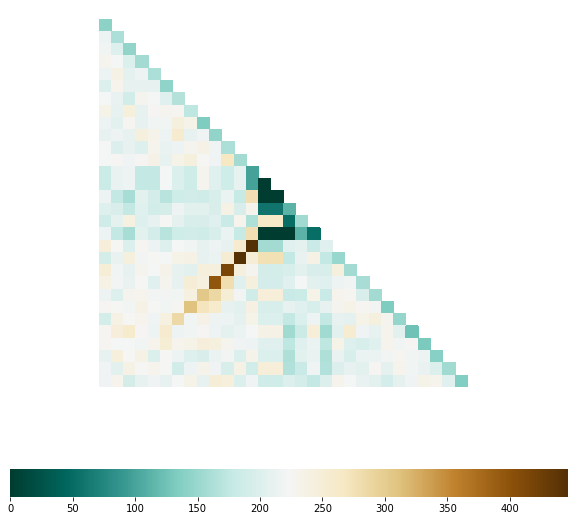

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(freq_list))
heatmap = sns.heatmap(freq_list, mask=mask, cmap='BrBG_r', xticklabels=False, yticklabels=False, square=True, cbar_kws = dict(use_gridspec=False,location="bottom"))
plt.savefig("AAGNHG_heatmap.png")

AAGNGH <br/>
동일하게 진행

In [ ]:
def match_func(seq):
  if re.match('AAG[ACGU]G[AUC]', seq):
    return True
  else: return False

aagngh = pentadecamer[pentadecamer.hexamer.apply(lambda x: match_func(x))]
aagngh

,pentadeca,hexamer,flank
8,AGGUGCCAUUCCAAAGCGUCGUGAGGCAUCU,AAGCGU,CA......CG
11,CGUUGUUUAAGUUAAGGGAUCUUAAACAUUU,AAGGGA,UU......UC
13,CAGUCCUGCUGGGAAGAGCCCCAAAGCCAGA,AAGAGC,GG......CC
14,GGCUUGAUUGGUAAAGUGUGCCAAGGAAAUA,AAGUGU,UA......GC
28,ACAACAACUGUCCAAGGGAUCGCUGAUGAUU,AAGGGA,CC......UC
...,...,...,...
9685,UAGUCGGUGGGAGAAGGGACACUCACUCUGG,AAGGGA,AG......CA
9701,UUAUUAAUCAAGGAAGAGAAAAAGUUGUAGA,AAGAGA,GG......AA
9706,AGAAAAAAAAAUGAAGUGCUUGGGUCAGUUA,AAGUGC,UG......UU
9718,GCGGGAAUAUGAAAAGCGUGUUUCUGCAAUA,AAGCGU,AA......GU


In [ ]:
aagngh.pentadeca.to_csv("AAGNGH_pentadeca.txt", sep='\t', index=False, header=False)

<img src="https://drive.google.com/uc?export=download&id=1TVe2H3fLMq_bVEXknu3XPVBr0EdziQ0M">


In [ ]:
wc_pair_aagngh = dict()
for i in range(0, 31):
  for j in range(0, 31):
    wc_pair_aagngh[(i,j)] = get_wc_pair_freq(i,j,aagngh)


In [ ]:
freq_df = pd.DataFrame.from_dict(wc_pair_aagngh, orient="index")
freq_df.index = pd.MultiIndex.from_tuples(freq_df.index)
freq_df.index.names = ['x', 'y']
freq_df = freq_df.reset_index()
freq_df['x'] = freq_df['x'] - 15 
freq_df['y'] = freq_df['y'] - 15

In [ ]:
import numpy as np

x_list = freq_df['x'].tolist()
y_list = freq_df['y'].tolist()
freq_list = np.array(freq_df[0].tolist()).reshape(31,31)

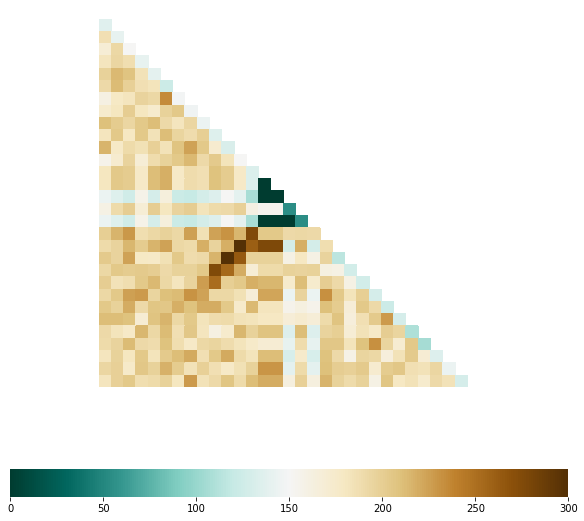

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(freq_list))
heatmap = sns.heatmap(freq_list, mask=mask, cmap='BrBG_r', xticklabels=False, yticklabels=False, square=True, cbar_kws = dict(use_gridspec=False,location="bottom"))
plt.savefig("AAGNGH_heatmap.png")